In [320]:
import os
import urllib.request
import csv
import pandas as pd 
import json
from time import sleep
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

### Choose one or more web API
<p>The API choosen for the assignment is from https://www.weatherbit.io/api.
This API is called as Forecast API which gives 16 days daily forecast for any location in the world.
The API is freely available just by looging in to the wratherbit website, it provides 1000 call per day with maximum 30 calls per minute.</p>
<p>We need to pass the city name along with the API key to returns the following fields for a pirticular city:</p>
<p>valid_Date , Moonrise_Timestamp , Relative_Humidity , Average_Preasure , Sunset_Timestamp , Average_Ozone , Moon_Phase , Wind_Direction , Wind_Speed , Verbal_Wind_Direction , Wind_Gust_Speed , Snow_Depth , Clouds , Sunrise_Timestamp , Temperature , Maximum_Temperature , Minimum_Temperature , Minimum_Feels_Like_Temperature , Maximum_Feels_Like_Temperature , Probablity_of_Precipitation , Sea_Level_Preasure , Visiblity , Dew_Point , Accumalated_Snowfall , UX_Index , Wind_Direction , Solar_radiation , Cloud_High_Level , Equivalent_Precipitation , Weather_icon_Code , Weather_Code , Mooneset_Timestamp , Mid_cloud_coverage , Low_cloud_coverage , Weather_Description.</p>

In [21]:
api_key = "9c29a576ebe24ed6a8a103354a80e2d9" #Set a variable for holding the API key

### Collect Data From the Web API
<p>The below function(collect_data) is used to collect the data from the API, this function accepts one paramater i.e linK which contains the get request of the data.</p>

In [12]:
#Function call the API and store the data into python list
def collect_data(link):
    sleep(2) #since 30 calls are allowed per minute we use the sleep function to avoid the "maximum call reached" error 
    try:     #Handling any kind of execptions while calling the API
        response = urllib.request.urlopen(link)
        #decoding the Json data into Python Dict.
        raw_json = response.read().decode()
        response = json.loads(raw_json)
        return response
    except:
        print("error but continue")

### Store the data into appropriate format for subsequent analysis
<p>The collected data is stored in a csv file named Weather_Forecast_Ireland.csv</p>
<p>To store the records we make use of two functions, initiall the create_heading_csv function is used to create the header of the data and then late store_data function is used to store the data from the API</p>

In [13]:
#Function for creating the header of the CSV File
def create_heading_csv(heading):
    #Opening the file in writting mode
        fout = open("Weather_Forcast_Ireland.csv","w")
        for i in heading:
            fout.write(str(i))
            fout.write(",")
        fout.write("\n")
        #closing the file+
        fout.close()

In [18]:
#Function to store the data 
def store_data(response,city):
    #Actual data is extracted from the response dict
    maindata = response["data"]
    #each dict contains data for a pirticular city for 16 days hence storing each record as a seperate row
    for data in maindata:
        weather_data = data["weather"]
        write_data = [city,data["valid_date"],data["moonrise_ts"],data["rh"],data["pres"],data["sunset_ts"],data["ozone"],data["moon_phase"],data["wind_cdir"],data["wind_spd"],data["wind_cdir_full"],data["wind_gust_spd"],data["snow_depth"],data["clouds"],data["sunrise_ts"],data["temp"],data["max_temp"],data["min_temp"],data["app_min_temp"],data["app_max_temp"],data["pop"],data["slp"],data["vis"],data["dewpt"],data["snow"],data["uv"],data["wind_dir"],data["max_dhi"],data["clouds_hi"],data["precip"],weather_data["icon"],weather_data["code"],data["moonset_ts"],data["clouds_mid"],data["clouds_low"],weather_data["description"]]
        #Opening the file in append mode 
        fout = open("Weather_Forcast_Ireland.csv","a")
        for i in write_data:
            fout.write(str(i))
            fout.write(",")
        fout.write("\n")
        #Closing the file
        fout.close()

In [15]:
#Calling the Create_heading_csv function to create the header of csv file
heading = ["City","valid_Date","Moonrise_Timestamp","Relative_Humidity","Average_Preasure","Sunset_Timestamp","Average_Ozone","Moon_Phase","Wind_Direction","Wind_Speed","Verbal_Wind_Direction","Wind_Gust_Speed","Snow_Depth","Clouds","Sunrise_Timestamp","Temperature","Maximum_Temperature","Minimum_Temperature","Minimum_Feels_Like_Temperature","Maximum_Feels_Like_Temperature","Probablity_of_Precipitation","Sea_Level_Preasure","Visiblity","Dew_Point","Accumalated_Snowfall","UX_Index","Wind_Direction","Solar_radiation","Cloud_High_Level","Equivalent_Precipitation","Weather_icon_Code","Weather_Code","Mooneset_Timestamp","Mid_cloud_coverage","Low_cloud_coverage","Weather_Description"]
create_heading_csv(heading)

### Multiple calls to the API to download Sufficient data
<p> A list of cities(All the Cities of Ireland) are created to extract all the forcast data </p>

In [19]:
#Created a list of all the cities whose forcast data need to be extracted
city = ["Dublin","Cork","Galway","Limerick","Waterford","Londonderry","Belfast","Kilkenny","Drogheda","Dundalk","Athlone","Killarney","Kinsale","Swords","Navan","Bray","Cobh","Kells","Sligo","Blarney","Ennis","Tallaght","Westport","Tralee","Shannon","Lisburn","Newry","Naas","Armagh","Letterkenny","Midleton","Mullingar","Balbriggan","Clifden","Clonmel","Cashel","Youghal","Antim","Mallow","Wexford","Carlow","Tuam","Tullamore","Maynooth","Clonakilty","Castlebar","Greystones"]
for city in city:
    link = "https://api.weatherbit.io/v2.0/forecast/daily?city="+city+"&key="+api_key
    #calling the collect_data function to ge all the data in response dict
    response = collect_data(link)
    #Calling the function store_data to store the entire data in csv format
    store_data(response,city)

### Load and represent the data using appropriate data structure and apply preprocessing step
<p>As the CSV file is created we will use the pandas library to represent the data as data frames. Further we will check if there is any missing values in the data </p>
<p>Then we will filter the data so as to select the specific field for analysis and normalization is applied for all the numeric field the formula used for normalization is x = (x-min(x))/(min(x)-max(x))</p>
<p>once a data set is normalized a box plot is used to identify the outliers are later the aggregation is done based on city with median as the aggregation function to decrease the effect of these outliers</p>

In [234]:
data_for_analysis = pd.read_csv("Weather_Forcast_Ireland.csv")
data_for_analysis.iloc[0:5]

,City,valid_Date,Moonrise_Timestamp,Relative_Humidity,Average_Preasure,Sunset_Timestamp,Average_Ozone,Moon_Phase,Wind_Direction,Wind_Speed,...,Wind_Direction.1,Solar_radiation,Cloud_High_Level,Equivalent_Precipitation,Weather_icon_Code,Weather_Code,Mooneset_Timestamp,Mid_cloud_coverage,Low_cloud_coverage,Weather_Description
0,Dublin,23-03-2019,1553373328,66,1029.91,1553366298,373.953,0.857119,SW,1.72383,...,228,None,86,0.000000,c04d,804,1553328676,84,19,Overcast clouds
1,Dublin,24-03-2019,1553464582,70,1029.49,1553452803,368.087,0.771534,W,3.98555,...,272,None,4,0.041016,c03d,803,1553416744,0,38,Broken clouds
2,Dublin,25-03-2019,1553555643,75,1032.23,1553539309,323.365,0.676013,W,2.15362,...,274,None,6,0.046875,c03d,803,1553505099,1,64,Broken clouds
3,Dublin,26-03-2019,1553560030,72,1032.30,1553625814,316.511,0.57564,WSW,2.43432,...,257,None,7,0.000000,c03d,803,1553593828,0,46,Broken clouds
4,Dublin,27-03-2019,1553650432,75,1032.74,1553712319,338.654,0.474643,W,2.80404,...,277,None,5,0.000000,c04d,804,1553682985,0,80,Overcast clouds


In [217]:
data_for_analysis.describe()

,Relative_Humidity,Average_Preasure,Average_Ozone,Wind_Speed,Wind_Gust_Speed,Snow_Depth,Clouds,Temperature,Maximum_Temperature,Minimum_Temperature,...,Visiblity,Dew_Point,Accumalated_Snowfall,UX_Index,Wind_Direction.1,Cloud_High_Level,Equivalent_Precipitation,Weather_Code,Mid_cloud_coverage,Low_cloud_coverage
count,752.000000,752.000000,752.00000,752.000000,752.000000,752.000000,752.000000,752.000000,752.000000,752.000000,...,752.000000,752.000000,752.000000,752.000000,752.000000,752.000000,752.000000,752.00000,752.000000,752.000000
mean,79.106383,1010.830287,375.35044,4.485638,10.299040,2.353989,56.888298,7.234176,10.532979,4.028989,...,13.339215,3.603989,1.294548,3.164396,212.376330,31.808511,2.162828,756.93484,24.238032,32.674202
std,7.924031,15.990957,46.70310,2.399321,4.298444,8.277506,27.742602,2.434405,2.929473,2.833932,...,10.199823,3.244754,5.799511,1.211658,62.194794,29.713959,4.302780,101.31232,29.485883,28.009918
min,36.000000,949.060000,306.25900,0.823298,2.847910,0.000000,0.000000,-3.500000,-2.400000,-8.100000,...,0.000000,-15.800000,0.000000,0.513963,31.000000,0.000000,0.000000,500.00000,0.000000,0.000000
25%,75.000000,999.906000,335.71150,2.821883,7.132400,0.000000,38.000000,6.000000,8.675000,2.500000,...,0.000000,1.300000,0.000000,2.209812,168.000000,5.000000,0.000000,801.00000,0.000000,4.000000
50%,80.000000,1011.860000,373.25800,4.098030,9.859390,0.000000,58.000000,7.500000,10.500000,4.200000,...,15.125050,4.400000,0.000000,2.976650,222.000000,23.500000,0.125000,803.00000,9.000000,30.000000
75%,84.000000,1024.257500,404.07000,5.367908,12.604500,0.000000,80.000000,8.800000,11.900000,6.000000,...,24.050000,5.700000,0.000000,4.035378,260.000000,52.000000,2.375000,804.00000,45.000000,53.250000
max,97.000000,1037.050000,493.29500,14.694500,25.308500,53.300000,100.000000,15.700000,21.000000,13.800000,...,24.100200,12.000000,39.750000,6.992640,356.000000,100.000000,26.187500,804.00000,100.000000,100.000000


In [218]:
#check for the missing values in the data
data_for_analysis.isnull().sum()

City                              0
valid_Date                        0
Moonrise_Timestamp                0
Relative_Humidity                 0
Average_Preasure                  0
Sunset_Timestamp                  0
Average_Ozone                     0
Moon_Phase                        0
Wind_Direction                    0
Wind_Speed                        0
Verbal_Wind_Direction             0
Wind_Gust_Speed                   0
Snow_Depth                        0
Clouds                            0
Sunrise_Timestamp                 0
Temperature                       0
Maximum_Temperature               0
Minimum_Temperature               0
Minimum_Feels_Like_Temperature    0
Maximum_Feels_Like_Temperature    0
Probablity_of_Precipitation       0
Sea_Level_Preasure                0
Visiblity                         0
Dew_Point                         0
Accumalated_Snowfall              0
UX_Index                          0
Wind_Direction.1                  0
Solar_radiation             

In [219]:
#getting the various data types of each column
data_for_analysis.dtypes.value_counts() 

float64    16
object     12
int64       8
dtype: int64

In [276]:
# filter the attributes
filtered_data = data_for_analysis[["City","valid_Date","Relative_Humidity","Average_Preasure","Average_Ozone","Temperature"]]

In [278]:
#Normalize the dataset
filtered_data["Relative_Humidity"] = ((filtered_data["Relative_Humidity"]-filtered_data["Relative_Humidity"].min())/(filtered_data["Relative_Humidity"].max()-filtered_data["Relative_Humidity"].min()))
filtered_data["Average_Preasure"] = ((filtered_data["Average_Preasure"]-filtered_data["Average_Preasure"].min())/(filtered_data["Average_Preasure"].max()-filtered_data["Average_Preasure"].min()))
filtered_data["Average_Ozone"] = ((filtered_data["Average_Ozone"]-filtered_data["Average_Ozone"].min())/(filtered_data["Average_Ozone"].max()-filtered_data["Average_Ozone"].min()))
filtered_data["Temperature"] = ((filtered_data["Temperature"]-filtered_data["Temperature"].min())/(filtered_data["Temperature"].max()-filtered_data["Temperature"].min()))
filtered_data.iloc[0:5]

C:\Users\mnaik\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\mnaik\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\mnaik\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.

,City,valid_Date,Relative_Humidity,Average_Preasure,Average_Ozone,Temperature
0,Dublin,23-03-2019,0.491803,0.918854,0.361930,0.536458
1,Dublin,24-03-2019,0.557377,0.914081,0.330567,0.552083
2,Dublin,25-03-2019,0.639344,0.945221,0.091458,0.614583
3,Dublin,26-03-2019,0.590164,0.946017,0.054813,0.661458
4,Dublin,27-03-2019,0.639344,0.951017,0.173202,0.640625


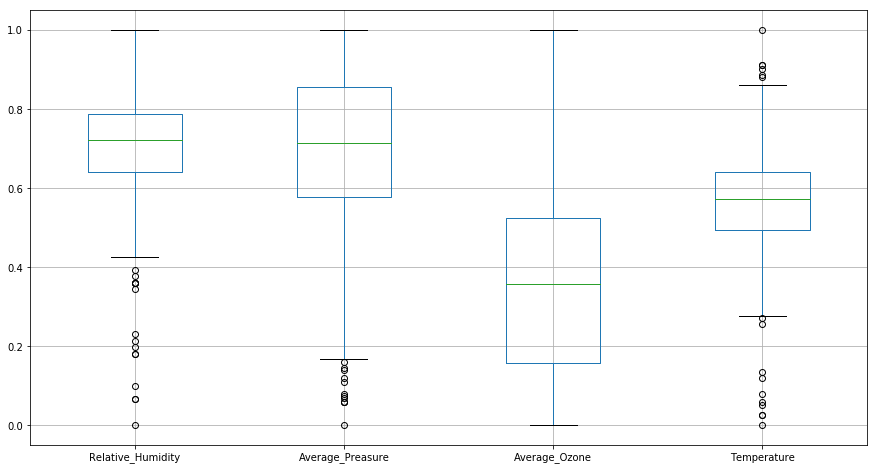

In [280]:
#Create the box plot to identify if there are any outliers in the filtered data
filtered_data.boxplot(figsize=(15,8))

In [281]:
#Apply the aggrigation function based on city with median as there are lot of outliers in data
grouped_data = filtered_data.groupby("City")
final_data_analysis = grouped_data.median()
final_data_analysis.iloc[0:5]

,Relative_Humidity,Average_Preasure,Average_Ozone,Temperature
City,,,,
Antim,0.491803,0.696954,0.282986,0.669271
Armagh,0.778689,0.113564,0.134995,0.484375
Athlone,0.754098,0.731163,0.389492,0.559896
Balbriggan,0.655738,0.817479,0.369407,0.617188
Belfast,0.590164,0.535555,0.158611,0.567708


### Data Analysis

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000023239A540F0>],
      dtype=object)

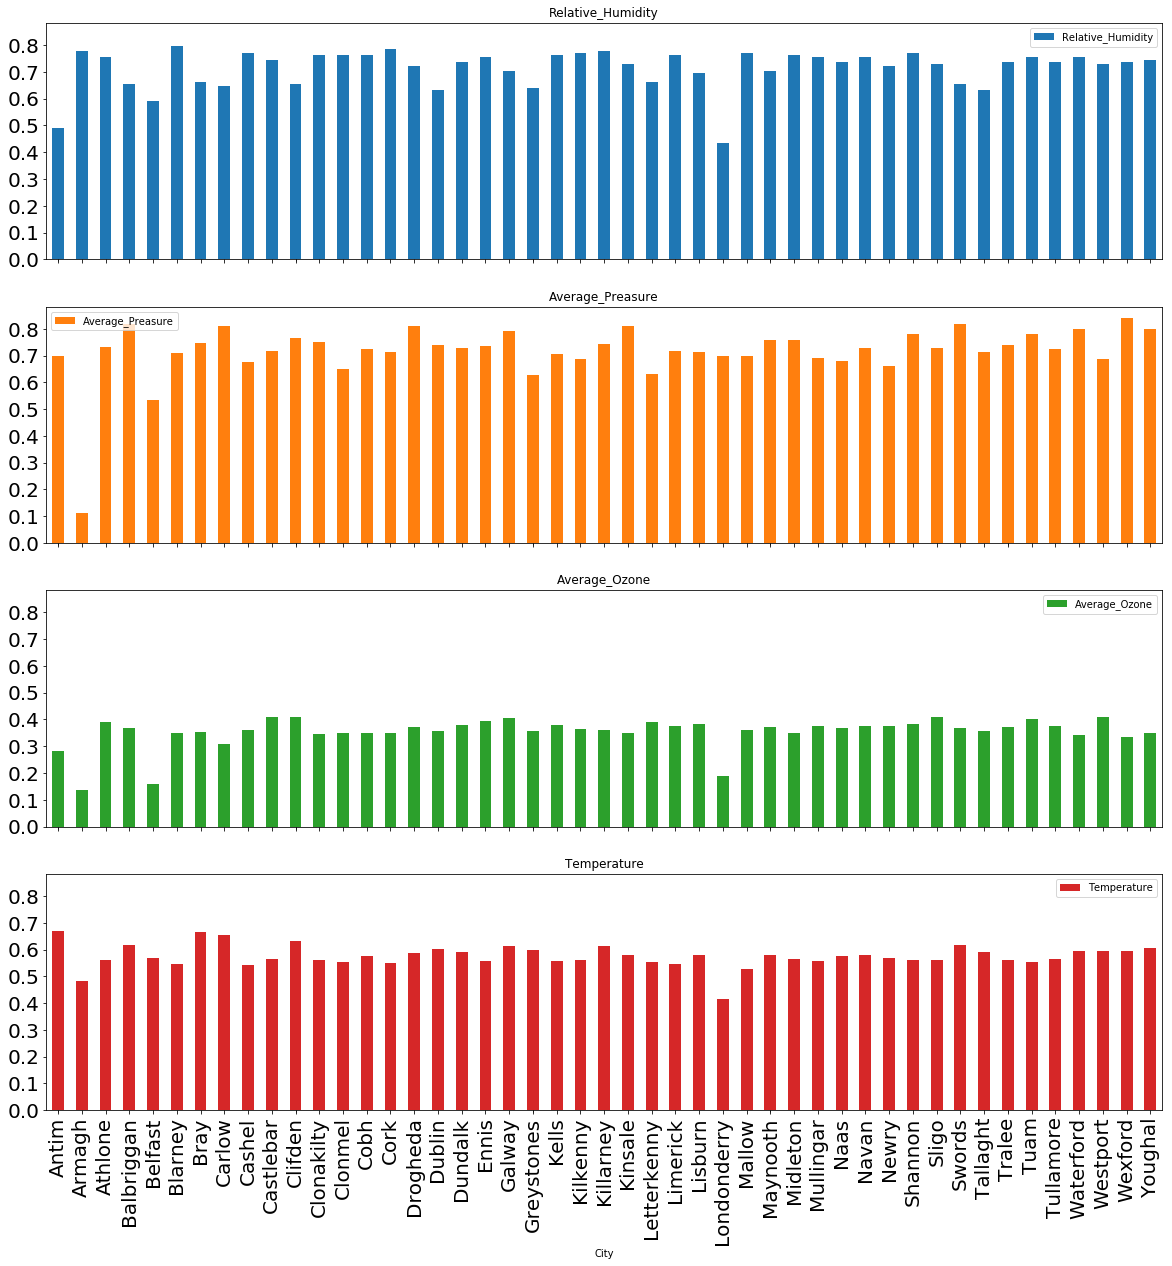

In [314]:
final_data_analysis.plot(kind='bar', subplots=True, layout=(4,1), figsize=(20,20), sharey=True,fontsize=20)

In [315]:
final_data_analysis.describe()

,Relative_Humidity,Average_Preasure,Average_Ozone,Temperature
count,47.000000,47.000000,47.000000,47.000000
mean,0.714859,0.716653,0.354496,0.575742
std,0.072913,0.106961,0.057185,0.041655
min,0.434426,0.113564,0.134995,0.416667
25%,0.680328,0.697011,0.349609,0.557292
50%,0.737705,0.726901,0.368071,0.570312
75%,0.762295,0.762388,0.379132,0.595052
max,0.795082,0.840834,0.410560,0.669271


<p>From the above graphs we can make the following conclusions,</p>
<p>Londondery City has the lowest humidity whereas Armagh has the highest humidity</p>
<p>Shannon has the lowest preasure whereas Armagh has the highest preasure</p>
<p>Bray has the lowest Average ozone whereas Tralee has the highest average ozone</p>
<p>Armagh has the lowest temperature whereas Carlow has the highest Temperature</p>



Data Distribution

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000232378564A8>,
      dtype=object)

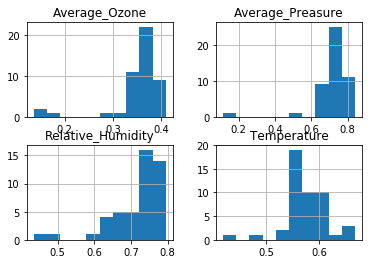

In [317]:
final_data_analysis.hist(stacked=True)

### Correlations
Temperature and relative humidity

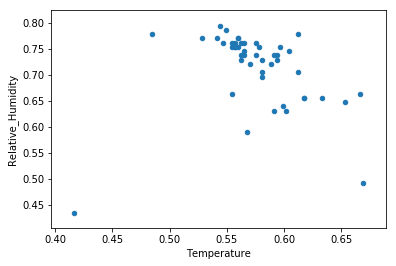

In [327]:
x = final_data_analysis["Temperature"]
y = final_data_analysis["Relative_Humidity"]
final_data_analysis.plot.scatter(x="Temperature", y="Relative_Humidity", s=20 )

In [328]:
np.corrcoef(x,y)

array([[ 1.        , -0.12648155],
       [-0.12648155,  1.        ]])

### Correlations
Temperature and Preasure

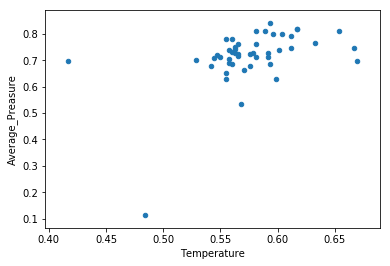

In [339]:
x = final_data_analysis["Temperature"]
y = final_data_analysis["Average_Preasure"]
final_data_analysis.plot.scatter(x="Temperature", y="Average_Preasure", s=20 )

In [340]:
np.corrcoef(x,y)

array([[1.       , 0.4476637],
       [0.4476637, 1.       ]])

### Correlations
Temperature and ozone

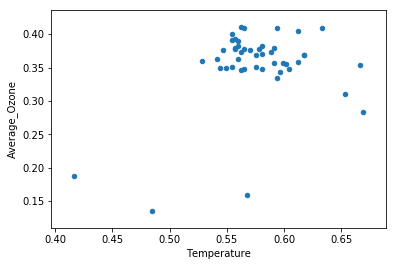

In [342]:
x = final_data_analysis["Temperature"]
y = final_data_analysis["Average_Ozone"]
final_data_analysis.plot.scatter(x="Temperature", y="Average_Ozone", s=20 )

In [343]:
np.corrcoef(x,y)

array([[1.        , 0.35207355],
       [0.35207355, 1.        ]])

C:\Users\mnaik\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: 'pandas.tools.plotting.scatter_matrix' is deprecated, import 'pandas.plotting.scatter_matrix' instead.
  


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000232459AD710>,
      dtype=object)

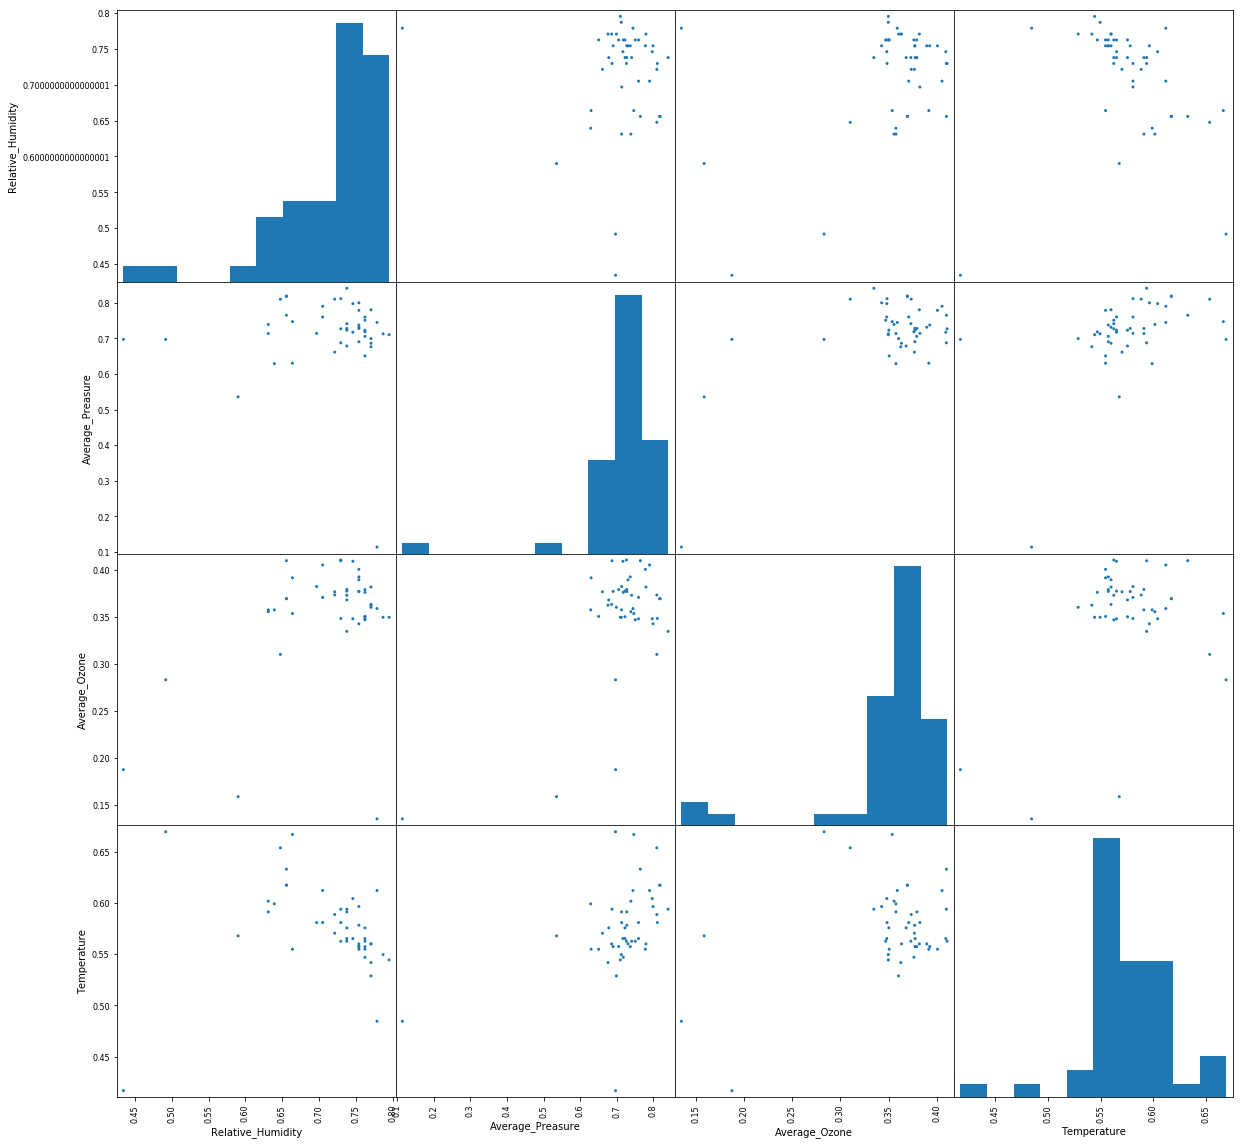

In [345]:
from pandas.tools.plotting import scatter_matrix
scatter_matrix(final_data_analysis, alpha=1, figsize=(20, 20))

### Tentative Conclusion:
From the above correlations values and the data we can conclude that, the temperature and humidity has weak negative correlation that is if temperature increases the humidity decreases and vice versa. Temperature and pressure has a strong positive correlations, Also temperature and ozone has a weak positive correlation.